In [1]:
sc

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
6,application_1589669259126_0008,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-6>

In [3]:
%%configure -f
{ "conf":{
"spark.pyspark.python": "python3",
"spark.pyspark.virtualenv.enabled": "true",
"spark.pyspark.virtualenv.type":"native",
"spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
}}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
7,application_1589669259126_0009,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
7,application_1589669259126_0009,pyspark,idle,Link,Link,✔


In [4]:
sc.install_pypi_package("matplotlib")
sc.install_pypi_package("pandas")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName('data_processing').getOrCreate()
dfGlobal = spark.read.csv("s3://proyecto-bigdata-top-tel/COVID-19_data/Mundial/time_series_covid19_confirmed_global_narrow.csv",inferSchema=True,header=True)
dfDeaths = spark.read.csv("s3://proyecto-bigdata-top-tel/COVID-19_data/Mundial/time_series_covid19_deaths_global_narrow.csv",inferSchema=True,header=True)
dfRecove = spark.read.csv("s3://proyecto-bigdata-top-tel/COVID-19_data/Mundial/time_series_covid19_recovered_global_narrow.csv",inferSchema=True,header=True)
dfGlobal = dfGlobal.withColumn("Casos",dfGlobal['Value'].astype('Integer'))
dfDeaths = dfDeaths.withColumn("Muertes",dfDeaths['Value'].astype('Integer'))
dfRecove = dfRecove.withColumn("Recuperados",dfRecove['Value'].astype('Integer'))
dfGlobal.groupBy('Country/Region').max('Casos').orderBy('max(Casos)', ascending=False).show(10)
dfDeaths.groupBy('Country/Region').max('Muertes').orderBy('max(Muertes)', ascending=False).show(10)
dfRecove.groupBy('Country/Region').max('Recuperados').orderBy('max(Recuperados)', ascending=False).show(10)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+----------+
|Country/Region|max(Casos)|
+--------------+----------+
|            US|   1467820|
|        Russia|    272043|
|United Kingdom|    240161|
|        Brazil|    233511|
|         Spain|    230698|
|         Italy|    224760|
|        France|    177319|
|       Germany|    175752|
|        Turkey|    148067|
|          Iran|    118392|
+--------------+----------+
only showing top 10 rows

+--------------+------------+
|Country/Region|max(Muertes)|
+--------------+------------+
|            US|       88754|
|United Kingdom|       34466|
|         Italy|       31763|
|         Spain|       27563|
|        France|       27485|
|        Brazil|       15662|
|       Belgium|        9005|
|       Germany|        7938|
|          Iran|        6937|
|   Netherlands|        5670|
+--------------+------------+
only showing top 10 rows

+--------------+----------------+
|Country/Region|max(Recuperados)|
+--------------+----------------+
|            US|          268376|


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

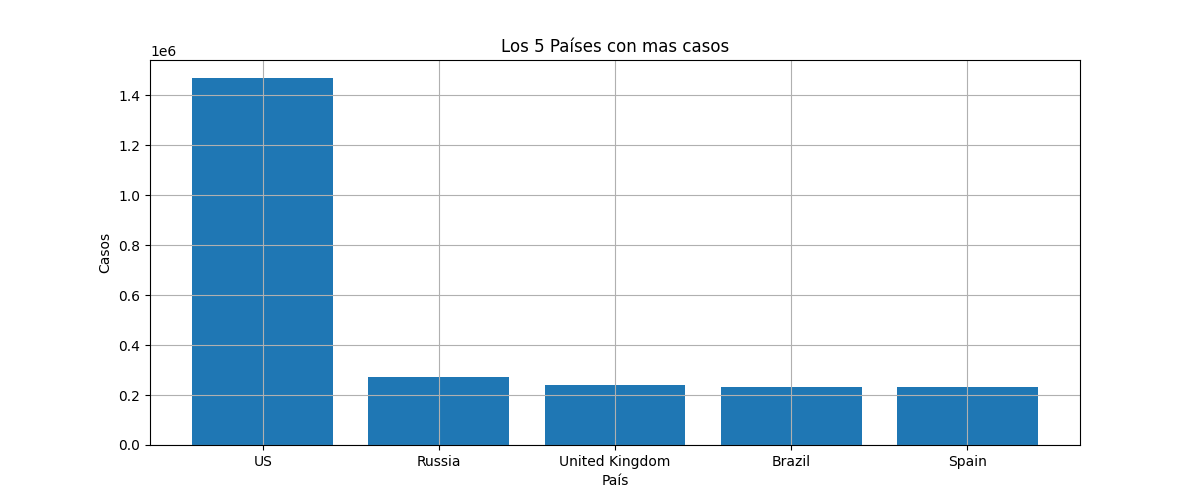

In [19]:
x = dfGlobal.groupBy('Country/Region').max('Casos').orderBy('max(Casos)', ascending = False).toPandas()['Country/Region'].values.tolist()
y = dfGlobal.groupBy('Country/Region').max('Casos').orderBy('max(Casos)',ascending=False).toPandas()['max(Casos)'].values.tolist()
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x[0:5], y[0:5])
ax.set(xlabel='País', ylabel='Casos',
       title='Los 5 Países con mas casos')
ax.grid()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

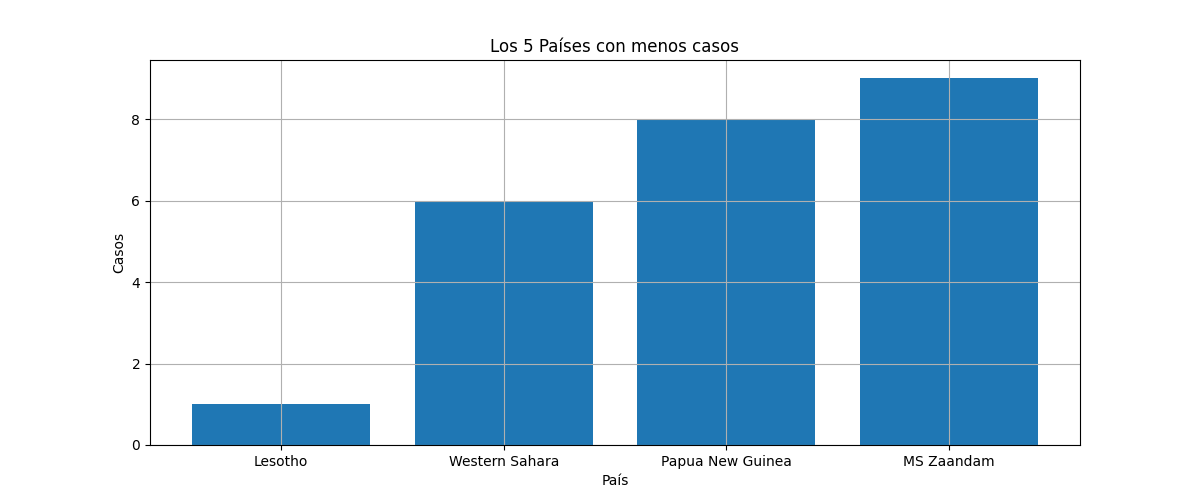

In [21]:
x = dfGlobal.groupBy('Country/Region').max('Casos').orderBy('max(Casos)').toPandas()['Country/Region'].values.tolist()
y = dfGlobal.groupBy('Country/Region').max('Casos').orderBy('max(Casos)').toPandas()['max(Casos)'].values.tolist()
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x[0:5], y[0:5])
ax.set(xlabel='País', ylabel='Casos',
       title='Los 5 Países con menos casos')
ax.grid()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

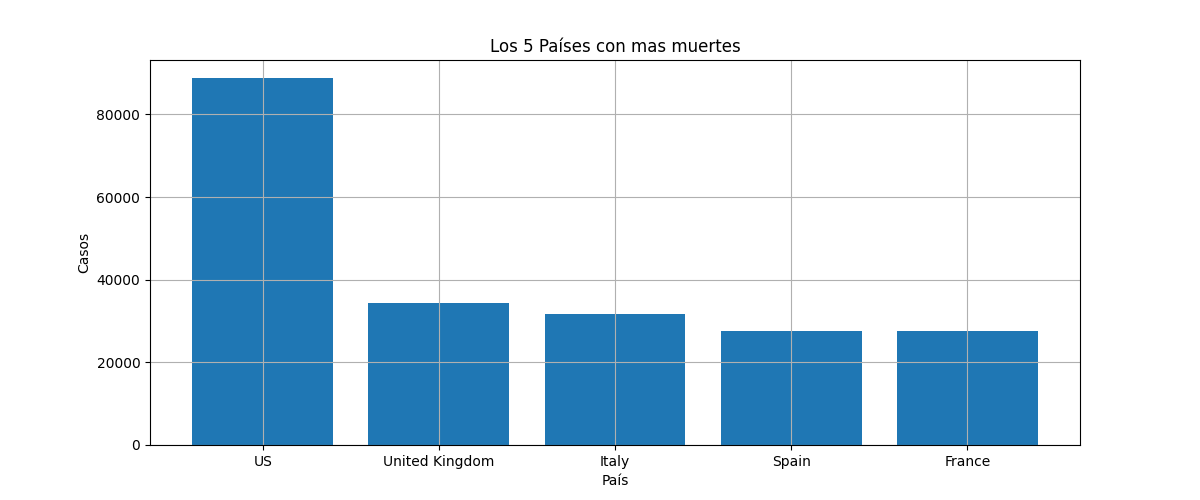

In [22]:
x = dfDeaths.groupBy('Country/Region').max('Muertes').orderBy('max(Muertes)', ascending = False).toPandas()['Country/Region'].values.tolist()
y = dfDeaths.groupBy('Country/Region').max('Muertes').orderBy('max(Muertes)',ascending=False).toPandas()['max(Muertes)'].values.tolist()
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x[0:5], y[0:5])
ax.set(xlabel='País', ylabel='Casos',
       title='Los 5 Países con mas muertes')
ax.grid()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

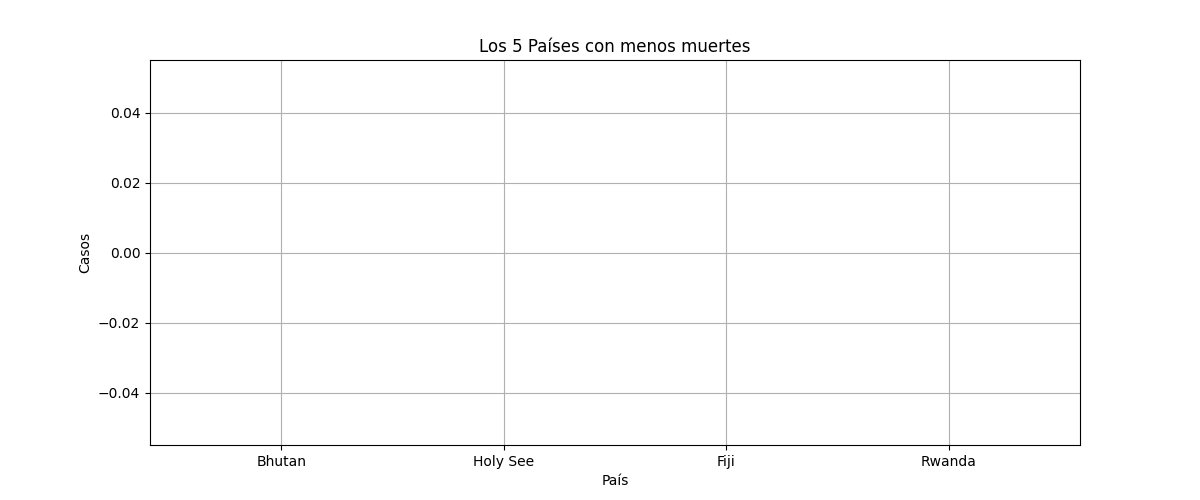

In [23]:
x = dfDeaths.groupBy('Country/Region').max('Muertes').orderBy('max(Muertes)').toPandas()['Country/Region'].values.tolist()
y = dfDeaths.groupBy('Country/Region').max('Muertes').orderBy('max(Muertes)').toPandas()['max(Muertes)'].values.tolist()
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x[0:5], y[0:5])
ax.set(xlabel='País', ylabel='Casos',
       title='Los 5 Países con menos muertes')
ax.grid()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

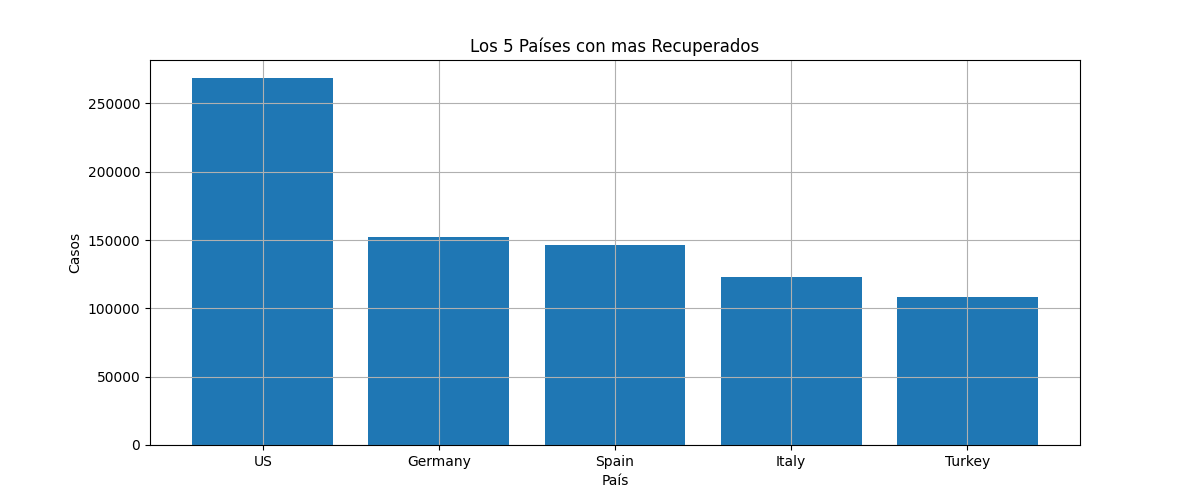

In [24]:
x = dfRecove.groupBy('Country/Region').max('Recuperados').orderBy('max(Recuperados)', ascending = False).toPandas()['Country/Region'].values.tolist()
y = dfRecove.groupBy('Country/Region').max('Recuperados').orderBy('max(Recuperados)',ascending=False).toPandas()['max(Recuperados)'].values.tolist()
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x[0:5], y[0:5])
ax.set(xlabel='País', ylabel='Casos',
       title='Los 5 Países con mas Recuperados')
ax.grid()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

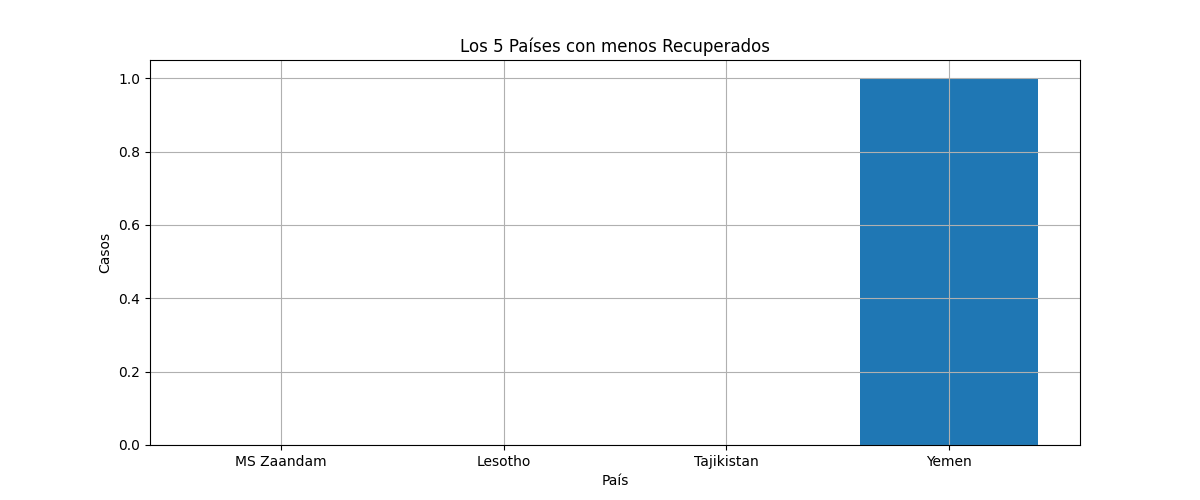

In [25]:
x = dfRecove.groupBy('Country/Region').max('Recuperados').orderBy('max(Recuperados)').toPandas()['Country/Region'].values.tolist()
y = dfRecove.groupBy('Country/Region').max('Recuperados').orderBy('max(Recuperados)').toPandas()['max(Recuperados)'].values.tolist()
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x[0:5], y[0:5])
ax.set(xlabel='País', ylabel='Casos',
       title='Los 5 Países con menos Recuperados')
ax.grid()
%matplot plt